# An introduction to knowledge representation with ontologies

## Introduction

Knowledge representation refers to a set of tools and processes designed to represent and organize human knowledge for use and sharing. While many ways of representing knowledge exist (e.g., natural language description, drawings, diagrams), this tutorial will focus on a formal and computational-friendly representation called ontology.

Ontologies were first introduced in philosophy as the study of being, categories of being and their relations. It later emerged in computer science as the specification of a conceptualization and relationships between them. Main motivations for building an ontology include sharing a common understanding of information via a common vocabulary and enabling reuse of domain knowledge. As opposed to other methods of representation, there is little ambiguity in ontologies and concepts are organized hierarchically. Thus, algorithms can easily work around ontologies to organize, describe and analyze concepts. Ontologies are used in various fields such as artificial intelligence, Semantic Web and biomedical informatics.

![](https://s9.postimg.org/bloaynqe7/pizza.png)

*A same concept like `Pizza` can be represented in different ways. (a) Natural language description (b) Drawing (c) Ontology. This tutorial will only focus on (c) as it is a formal and computational-friendly representation.*

## Tutorial content

This tutorial will be split into two sections. First, as ontologies differ from models that we studied so far in class, we will go through the key and basic elements that compose an ontology by building a small one from scratch. Then, as an example of concrete application, we will see how we can benefit from existing ontologies by working around the very popular [Gene Ontology](http://www.geneontology.org/).

- [Understanding the basics of ontology](#Understanding-the-basics-of-ontology)
- [Example of application: Gene Ontology](#Example-of-application:-Gene-Ontology)

## Understanding the basics of ontology

In this section, we will familiarize ourselves with the key components of an ontology. For learning purpose, we will build from scratch a small ontology around the concept of `University` as it is a concept that easily speaks to students.

Multiple languages can be used to construct an ontology. For this section, we will be using Web Ontology Language (OWL), a widely adopted language supported by the [Owlready2](http://pythonhosted.org/Owlready2/) module in Python. This module is for ontology-oriented programming, which means that ontology components will be manipulated as Python objects. It can be installed using `pip`:

    $ pip install --upgrade owlready2

If your installation was succesful, you should be able to run the following command:

In [1]:
from owlready2 import *

### Creating an empty ontology

Let's begin! The first step is to create our ontology. Ontologies are usually identified by Internationalized Resource Identifiers (IRI) which are similar to URLs. To create an empty ontology, we want to use the `get_ontology(iri)` function that takes an IRI (string) as a parameter. An easy way to verify if our object was succesfuly created is to check its `base_iri` attribute which should be the same as the chosen IRI.

In [2]:
iri = 'http://test.org/onto.owl'
onto = get_ontology(iri)
print(onto.base_iri)

http://test.org/onto.owl#


### Classes, subclasses and individuals

Now that our ontology is created, we can start by adding the concept of `University` as a class. A class is the basic unit within an ontology, it can refer to a set, a collection or a type of things. With Owlready2, a class is added to an ontology by creating a Python class which inherits from a superclass `Thing` (provided by the module) and initializes an attribute `namespace` with the corresponding ontology object, in our case `onto`.

In [3]:
class University(Thing):
    namespace = onto

Classes within an ontology can be listed using the `classes()` method. This method returns a generator for the classes defined in the ontology. We can either loop through the generator or convert it as a list using `list(generator)`.

In [4]:
def print_classes(ontology):
    """
    Print the name of every class within `ontology`.
    """
    for c in ontology.classes():
        print(c)

In [5]:
print_classes(onto)

onto.University


Then, we can extend our ontology with subclasses. A subclass is a class subsumed by one or multiple ontology class(es). Specifically, a subclass inherits all properties of its parent(s). We add a subclass to our ontology in the same way we define a subclass in Python. For example, we specify two different types of university, `PublicUniversity` and `PrivateUniversity`, by creating a Python class for each that inherits our previously defined `University` class.

In [6]:
class PublicUniversity(University):
    pass

class PrivateUniversity(University):
    pass

In [7]:
print_classes(onto)

onto.University
onto.PublicUniversity
onto.PrivateUniversity


Remember that an advantage of using ontologies is the hiearchically organization of concepts. As such, every class can have access to its subclasses using the method `descendants()` and its superclasses using the method `ancestors()`. Note that both of these methods include the caller class in their output.

In [8]:
print('Subclasses of `University`: {}'.format(University.descendants()))
print('Superclasses of `University`: {}'.format(University.ancestors()))

Subclasses of `University`: {onto.PublicUniversity, onto.University, onto.PrivateUniversity}
Superclasses of `University`: {owl.Thing, onto.University}


We can also add individuals to our ontology. An individual refers to a concrete object, it is equivalent to an instance of a class. To add an individual to our ontology, we create an instance of the corresponding Python class and pass the name of the individual (string) as a parameter. Let's add two individuals, `UCBerkeley` to our class `PublicUniversity` and `CarnegieMellonUniversity` to our class `PrivateUniversity`.

In [9]:
berkeley = PublicUniversity('UCBerkeley')
cmu = PrivateUniversity('CarnegieMellonUniversity')

Individuals within an ontology can be listed in a similar way as classes using the method `individuals()` from an ontology object.

In [10]:
def print_individuals(ontology):
    """
    Print the name of every individual within `ontology`.
    """
    for i in ontology.individuals():
        print(i)

In [11]:
print_individuals(onto)

onto.UCBerkeley
onto.CarnegieMellonUniversity


Additionally, we can also list instances of a particular class using the method `instances()`. Note that the parameter is a reference to the Python class.

In [12]:
def print_instances(ontology_class):
    """
    Print the name of every instance of `ontology_class`.
    """
    for i in ontology_class.instances():
        print(i)

In [13]:
print_instances(PrivateUniversity)

onto.CarnegieMellonUniversity


### Properties and relationships

Ontologies use properties and relationships (or relations) to specify how classes and individuals relate to one another. To introduce these components, we first need to create a new concept and individuals to which our `University` concept can relate. We propose to specify the concept of `State` with a group of state names as individuals.

In [14]:
class State(Thing):
    namespace = onto

california = State('California')
pennsylvania = State('Pennsylvania')
qatar = State('Qatar')

A relationship is defined as a triple (subject, property, object). While there is already an implicit relationship between superclasses and subclasses (e.g., a public university *is a* university), we can go beyond the inheritance relationship with this component.

To build a property, we need to specify two parameters: the domain and the range. The subject and the object of a relationship must be subclasses of respectively the domain and the range defined by the property. While the domain needs to be class, a range can either be a class, an individual or a data type (e.g., int, str, datetime.data).

To relate our `University` class to our `State` class, we define a property `has_campus_in` by creating a Python class. To define the domain and the range of our property, we adopt a specific syntax: `domain >> range`.

In [15]:
with onto:
    class has_campus_in(University >> State):
        pass

We can verify that the property has been correctly added to our ontology by listing all the properties with the method `properties()`.

In [16]:
def print_properties(ontology):
    """
    Print the name of every property within `ontology`.
    """
    for p in ontology.properties():
        print(p)

In [17]:
print_properties(onto)

onto.has_campus_in


Now, every Python instance of `University` can access a new attribute `has_campus_in`. To establish a relationship in our ontology, we simply need to initialize the attribute `has_campus_in` of an individual to a list of objects. Let's specify the campus locations of our two universities.

In [18]:
cmu.has_campus_in = [california, pennsylvania, qatar]
berkeley.has_campus_in = [california]
print('CMU has a campus in: {}'.format(cmu.has_campus_in))
print('UC Berkeley has a campus in: {}'.format(berkeley.has_campus_in))

CMU has a campus in: [onto.California, onto.Pennsylvania, onto.Qatar]
UC Berkeley has a campus in: [onto.California]


### Class constructs and restrictions

To ease the organization of concepts in an ontology, it is possible to apply restrictions on properties to build specific classes. For example, we can retrieve every subject in relationships (subject, property, object) in which the object meet specific requirements such as a minimum or a maximum value, a value within a given list or a cardinality.

Let's say we want to create a concept `SingleCampusUniversity`. For this class, we want to ensure that subclasses are universities with only one campus. With Owlready2, this can be achieved as follows:

In [19]:
class SingleCampusUniversity(University):
    equivalent_to = [University & has_campus_in.exactly(1, State)]

In the above code, we first apply a restriction to the `has_campus_in` property. This builds the class of all objects that has a campus in only one state. Then, we apply the logical operator & with the class `University` to ensure that every object is a university. Finally, we define an equivalent class `SingleCampusUniversity` with the use of the `equivalent_to` attribute to be able to manipulate this new class.

Note that there exist other methods than `exactly(cardinality, range)` to achieve different restrictions. Different logical operators can also be used to build new classes. If you are curious about them, you can check the [official documentation of Owlready2](http://pythonhosted.org/Owlready2/restriction.html).

### Worlds and reasoning

A powerful feature in ontologies is reasoning. Reasoning is typically used to verify the consistency of an ontology and to make inferences based on current knowledge. An example of application is reclassing individuals to appropriate classes given their relationships with other concepts.

For example, let's create a new concept `Student`. We define a property `lives_in` to specify in which state a student resides. Additionally, we create four individuals as examples.

In [20]:
class Student(Thing):
    namespace = onto

with onto:
    class lives_in(Student >> State):
        pass

californian = Student('Californian', lives_in = [california])
pennsylvanian = Student('Pennsylvanian', lives_in = [pennsylvania])
qatari = Student('Qatari', lives_in = [qatar])
unknown = Student('Unknown')

Some time later, we decide to be more precise in our ontology and to organize students given their states of residence. Thus, we define three new classes with restrictions on the property `lives_in`. We call these classes `CalifornianStudent`, `PennsylvanianStudent` and `QatariStudent`.

In [21]:
class CalifornianStudent(Student):
    equivalent_to = [Student & lives_in.value(california)]
    
class PennsylvanianStudent(Student):
    equivalent_to = [Student & lives_in.value(pennsylvania)]

class QatariStudent(Student):
    equivalent_to = [Student & lives_in.value(qatar)]

In a consistent ontology, our previously defined individuals should belong to these new classes. An automatic reclass of our individuals can be achieved with reasoning. However, a few things need to be set up before.

By default, OWL considers the world as *open*, which means that everything that we do not explicitly state in the ontology is not considered to be false. This can be problematic in our case as our ontology consider that `california` and `pennsylvania` possibly refer to the same state, or that a `CalifornianStudent` can also be a `PennsylvanianStudent` since we never stated that they were different. To solve this problem, we can either explicitly tell our ontology that our individuals are different with the `AllDifferent(individuals_list)` function or we can *close* the world with the `close_world(object)` function so that everything that is not explicitly stated is considered to be false.

In [22]:
AllDifferent([california, pennsylvania, qatar])
close_world(Student)

Now, we can perform our reasoning! Owlready2 provides a global function `sync_reasoner()` to perform a reasoning on the whole ontology. It requires a Java Virtual Machine (JVM) to run as the reasoner is written in Java. To illustrate the effects of the reasoning, we compare the classes of our individuals before and after the reasoning.

In [23]:
def print_instances_classes(ontology_class):
    for i in ontology_class.instances():
        print('{}: {}'.format(i.name, i.__class__))

In [24]:
print('-- Before reasoning')
print_instances_classes(Student);

-- Before reasoning
Californian: onto.Student
Pennsylvanian: onto.Student
Qatari: onto.Student
Unknown: onto.Student


In [25]:
%%capture
# The function is run in a captured cell as it outputs local configurations
sync_reasoner()

In [26]:
print('-- After reasoning')
print_instances_classes(Student);

-- After reasoning
Californian: onto.CalifornianStudent
Pennsylvanian: onto.PennsylvanianStudent
Qatari: onto.QatariStudent
Unknown: onto.Student


As we can see, the individuals were correctly reclassified in our new classes. Since we didn't specify a state of residence for `unknown`, it remains a `Student`.

### Saving an ontology into a file

Finally, an ontology can be saved into an OWL file using the method `save(filename)`. It can be later loaded using the method `load(filename)`.

In [27]:
onto.save("onto.owl")

## Example of application: Gene Ontology

Gene Ontology (GO) is a bioinformatics project designed to structure the description of genes and gene products within a common ontology for all living species. Since its creation, the ontology has enabled integration of standardized knowledge, knowledge extraction and aggregation, and improvements in the quality of ressources. In this section, we will perform a very basic exploration of GO.

For this section, we will be using GOATOOLS, a package specifically designed to manipulate GO. It can be installed running `pip`:

    $ pip install --upgrade goatools

If your installation was succesful, you should be able to download the ontology running the following command:

In [28]:
from goatools.base import download_go_basic_obo
go_file = download_go_basic_obo()

  EXISTS: go-basic.obo


We can now load the ontology using the function `GODag(obo_file)`.

In [29]:
from goatools.obo_parser import GODag
go = GODag("go-basic.obo")

load obo file go-basic.obo
go-basic.obo: fmt(1.2) rel(2018-03-31) 44,922 GO Terms


In GO, the basic unit is called *term*. You can see a *term* as a *class* or as an *individual*. A term is in part defined by an `id`, a `name` and a `namespace`. The `go` object that we initialized in the above code acts like a dictionnary, we can retrieve informations on a term by providing its `id`. For example, we can retrieve the name and the namespace of the GO term `GO:0048528`.

In [30]:
go_id = 'GO:0048528'
go_term = go[go_id]
print('GO term ID: {}'.format(go_term.id))
print('Go term name: {}'.format(go_term.name))
print('Go term namespace: {}'.format(go_term.namespace))

GO term ID: GO:0048528
Go term name: post-embryonic root development
Go term namespace: biological_process


Immediate parents (superclasses) and children (subclasses) of a GO term can also be accessed with the attributes `parents` and `children`.

In [31]:
def print_parents_terms(go_term):
    for t in go_term.parents:
        print(t)

def print_children_terms(go_term):
    for t in go_term.children:
        print(t)

In [32]:
print('-- Parents')
print_parents_terms(go_term)
print('-- Children')
print_children_terms(go_term)

-- Parents
GO:0090696	level-03	depth-04	post-embryonic plant organ development [biological_process]
GO:0048364	level-04	depth-04	root development [biological_process]
-- Children
GO:0048527	level-05	depth-06	lateral root development [biological_process]


Additionally, we can find all the parents and all the children of a given GO term using the methods `get_all_parents()` and `get_all_methods()`.

In [33]:
def print_all_parents_terms(go, go_id):
    parents = go[go_id].get_all_parents()
    for p in parents:
        print(go[p])

def print_all_children_terms(go, go_id):
    children = go[go_id].get_all_children()
    for c in children:
        print(go[c])

In [34]:
print('-- All the parents')
print_all_parents_terms(go, go_id)
print('-- All the children')
print_all_children_terms(go, go_id)

-- All the parents
GO:0009791	level-02	depth-02	post-embryonic development [biological_process]
GO:0090696	level-03	depth-04	post-embryonic plant organ development [biological_process]
GO:0008150	level-00	depth-00	biological_process [biological_process]
GO:0099402	level-03	depth-03	plant organ development [biological_process]
GO:0048364	level-04	depth-04	root development [biological_process]
GO:0032501	level-01	depth-01	multicellular organismal process [biological_process]
GO:0048856	level-02	depth-02	anatomical structure development [biological_process]
GO:0032502	level-01	depth-01	developmental process [biological_process]
-- All the children
GO:0048527	level-05	depth-06	lateral root development [biological_process]


GOATOOLS also provides us with drawing tools. The Python `pygraphviz` is required, it can be installed using `pip`:

    $ pip install --upgrade pygraphviz
    
If you get an error, you may want to install the following packages and retry:

    $ sudo apt install python-dev graphviz libgraphviz-dev pkg-config

Once the installation is done, we can draw a lineage using the method `draw_lineage([term], filename)`, then display the image using `IPython.display.Image`.

lineage info for terms ['GO:0048528'] written to lineage.png


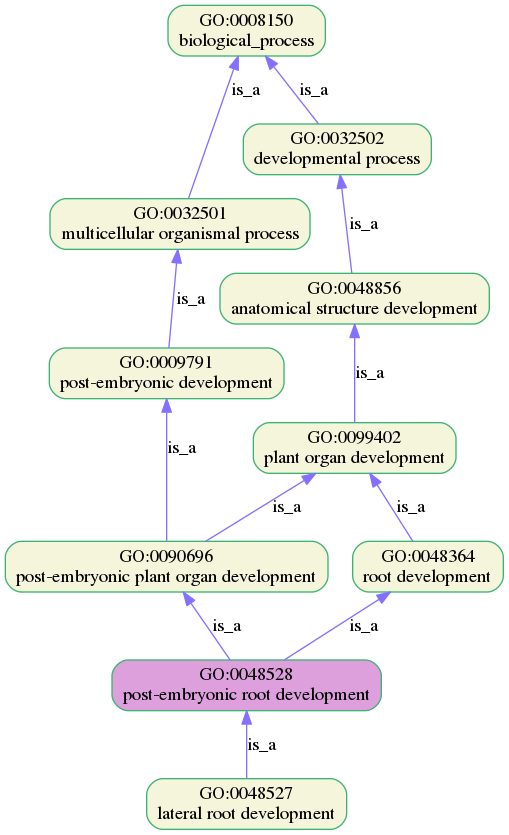

In [35]:
from IPython.display import Image
lineage_filename = 'lineage.png'
go.draw_lineage([go_term], lineage_img=lineage_filename)
Image(lineage_filename)

## Additionnal ressources

1. A Guide to Creating Your First Ontology: https://protege.stanford.edu/publications/ontology_development/ontology101-noy-mcguinness.html
2. Owlready2's official documentation: http://pythonhosted.org/Owlready2/
3. Apache Jena, a Java framework to manipulate ontologies: https://jena.apache.org/documentation/ontology/
4. GOATOOLS' GitHub repository: https://github.com/tanghaibao/goatools
5. The Gene Ontology Handbook: https://link.springer.com/content/pdf/10.1007%2F978-1-4939-3743-1.pdf
6. Freely available ontologies: https://protegewiki.stanford.edu/wiki/Protege_Ontology_Library#OWL_ontologies